In [1]:
import numpy as np
import pandas as pd

In [2]:
spam_df = pd.read_csv('spam_data.csv', sep=",", encoding='latin')

In [3]:
# missing values
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
spam_df['Unnamed: 2'].fillna(' ', inplace=True)
spam_df['Unnamed: 3'].fillna(' ', inplace=True)
spam_df['Unnamed: 4'].fillna(' ', inplace=True)
spam_df['v2'] = spam_df['v2'] + ' ' + spam_df['Unnamed: 2'] + ' ' + spam_df['Unnamed: 3'] + ' ' + spam_df['Unnamed: 4']
spam_df.drop(columns=[col.strip() for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if col.strip() in spam_df.columns], inplace=True)
spam_df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
# rename column
spam_df.rename(columns={'v1':'target','v2':'text'}, inplace = True)
spam_df.sample(3)

,target,text
223,ham,U say leh... Of course nothing happen lar. Not...
3608,ham,Joy's father is John. Then John is the ____ of...
341,ham,I take it the post has come then! You must hav...


In [6]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
spam_df['target'] = le.fit_transform(spam_df['target'])
spam_df.sample(3)

,target,text
1881,0,Ok.. ÌÏ finishing soon?
3143,0,"Haha I heard that, text me when you're around ..."
471,0,"How long has it been since you screamed, princ..."


In [7]:
# duplicates
spam_df.duplicated().sum()

403

In [8]:
spam_df = spam_df.drop_duplicates(keep='first')

In [9]:
spam_df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

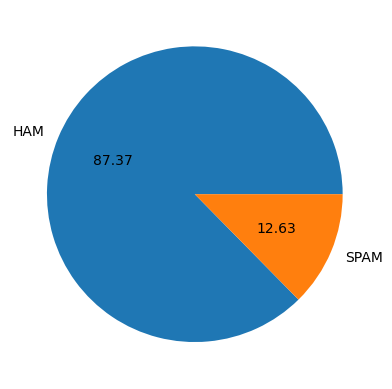

In [10]:
# matplot visuals
import matplotlib.pyplot as plt
plt.pie(spam_df['target'].value_counts(), labels = ['HAM','SPAM'], autopct="%0.2f")
plt.show() #IMBALANCED DATA

In [11]:
# deeper analysis on text
import nltk

In [12]:
spam_df.loc[:,'no_chars'] = spam_df['text'].apply(len)
spam_df.head(2)

,target,text,no_chars
0,0,"Go until jurong point, crazy.. Available only ...",117
1,0,Ok lar... Joking wif u oni...,35


In [13]:
spam_df['no_words'] = spam_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
spam_df.head(3)

,target,text,no_chars,no_words
0,0,"Go until jurong point, crazy.. Available only ...",117,24
1,0,Ok lar... Joking wif u oni...,35,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,161,37


In [14]:
spam_df['no_sentences'] = spam_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
spam_df.head()

,target,text,no_chars,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",117,24,2
1,0,Ok lar... Joking wif u oni...,35,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,161,37,2
3,0,U dun say so early hor... U c already then say...,55,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",67,15,1


In [15]:
spam_df[['no_chars','no_words','no_sentences']].describe()

,no_chars,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,85.516541,18.592184,1.952989
std,58.454507,13.389124,1.365172
min,8.000000,1.000000,1.000000
25%,42.000000,9.000000,1.000000
50%,67.000000,15.000000,1.000000
75%,125.000000,26.000000,2.000000
max,916.000000,220.000000,28.000000


In [16]:
# HAM
spam_df[spam_df['target'] == 0][['no_chars','no_words','no_sentences']].describe()

,no_chars,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,77.037422,17.267936,1.805137
std,56.680357,13.574957,1.281310
min,8.000000,1.000000,1.000000
25%,40.000000,8.000000,1.000000
50%,59.000000,13.000000,1.000000
75%,98.000000,22.000000,2.000000
max,916.000000,220.000000,28.000000


In [17]:
# SPAM
spam_df[spam_df['target'] == 1][['no_chars','no_words','no_sentences']].describe()

,no_chars,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,144.156202,27.750383,2.975498
std,29.913630,6.978309,1.484897
min,19.000000,2.000000,1.000000
25%,138.000000,25.000000,2.000000
50%,155.000000,29.000000,3.000000
75%,163.000000,32.000000,4.000000
max,230.000000,46.000000,8.000000


<AxesSubplot:xlabel='no_chars', ylabel='Count'>

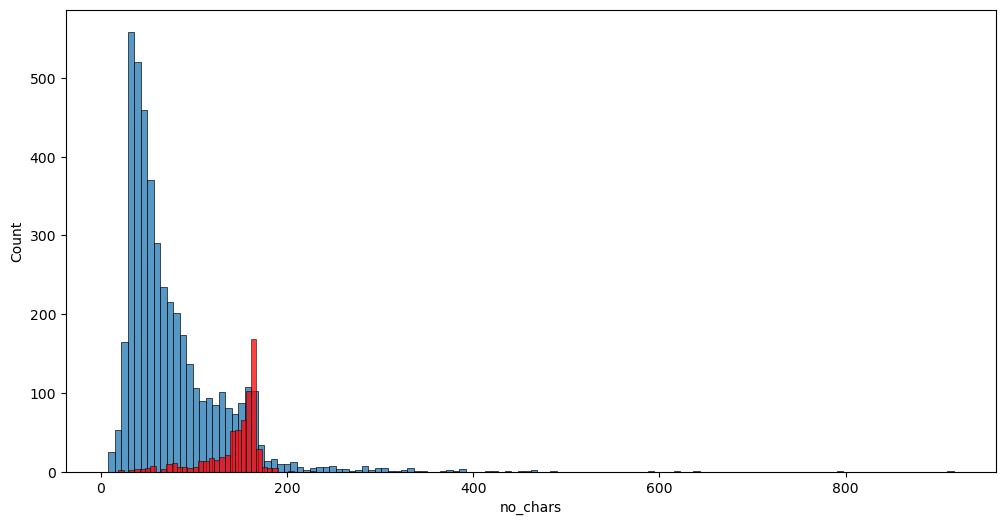

In [18]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['target']==0]['no_chars'])
sns.histplot(spam_df[spam_df['target']==1]['no_chars'], color='red')

<AxesSubplot:xlabel='no_words', ylabel='Count'>

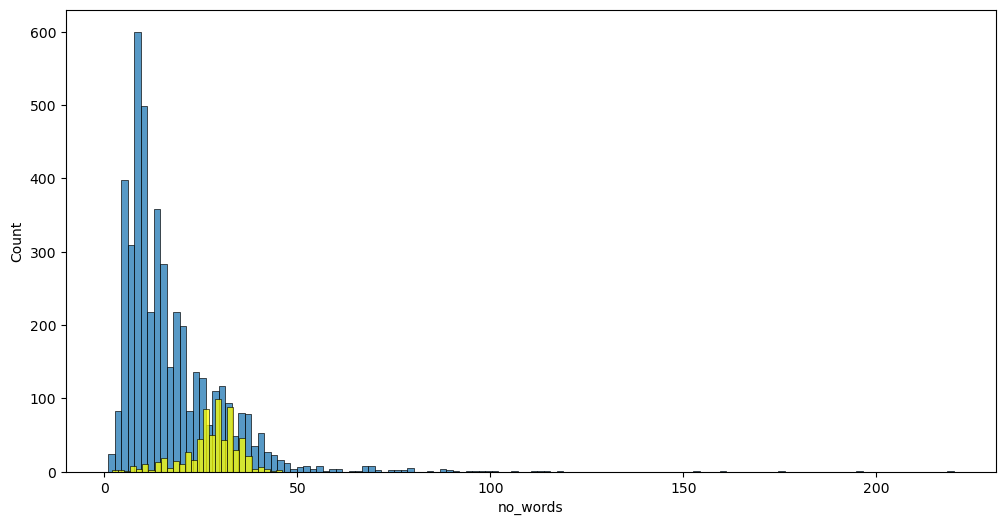

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['target']==0]['no_words'])
sns.histplot(spam_df[spam_df['target']==1]['no_words'], color='yellow')

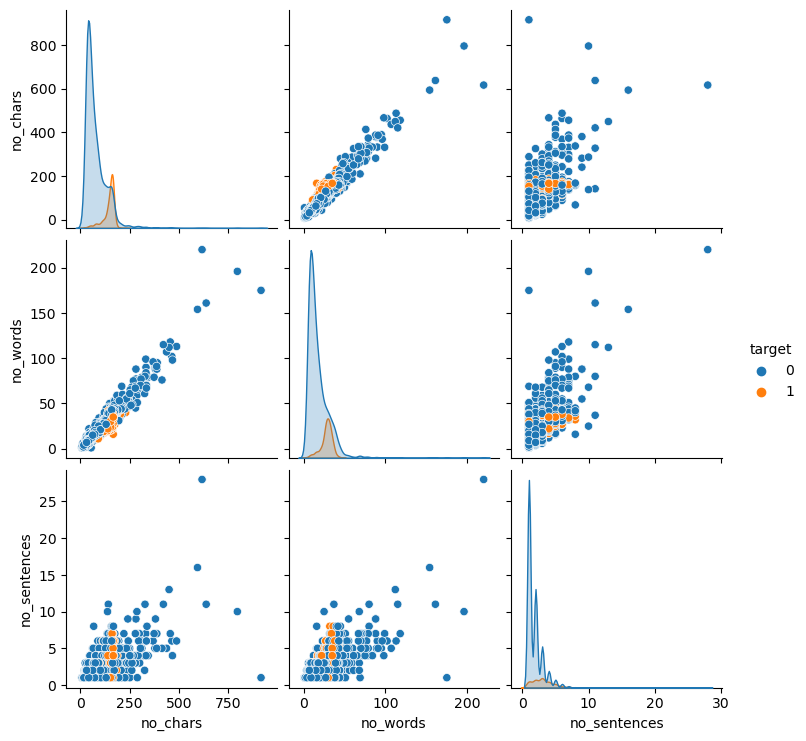

In [20]:
sns.pairplot(spam_df,hue='target')

<AxesSubplot:>

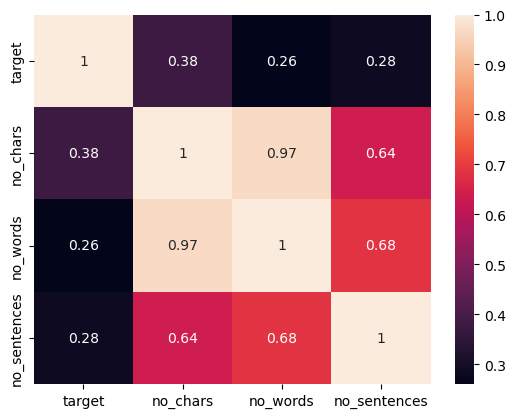

In [21]:
sns.heatmap(spam_df.corr(),annot=True)

In [22]:
import re
pattern = r'[^\w\s]'
spam_df['text'] = spam_df['text'].apply(lambda x: re.sub(pattern,' ', x))

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    li = []
    for i in text:
        li.append(wnl.lemmatize(i))
    
    text = li[:]
    li.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            li.append(i)
            
    text = li[:]
    li.clear()
    for i in text:
        li.append(ps.stem(i))    
            
    return " ".join(li)

In [25]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"'m gon na home soon n't want talk stuff anymor tonight k 've cri enough today"

In [26]:
spam_df['trans_text'] = spam_df['text'].apply(transform_text)
spam_df.head(3)

,target,text,no_chars,no_words,no_sentences,trans_text
0,0,Go until jurong point crazy Available only ...,117,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar Joking wif u oni,35,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,161,37,2,free entri 2 wkli comp win fa cup final tkt 21...


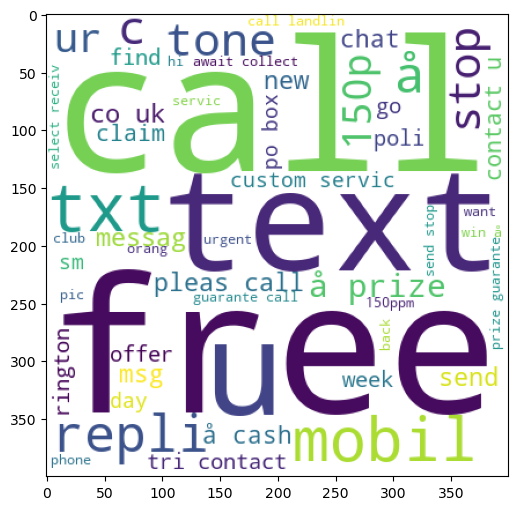

In [27]:
from wordcloud import WordCloud
#SPAM
wc = WordCloud(width=400, height=400, min_font_size=10, background_color='white')
spam_wc = wc.generate(spam_df[spam_df['target']==1]['trans_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

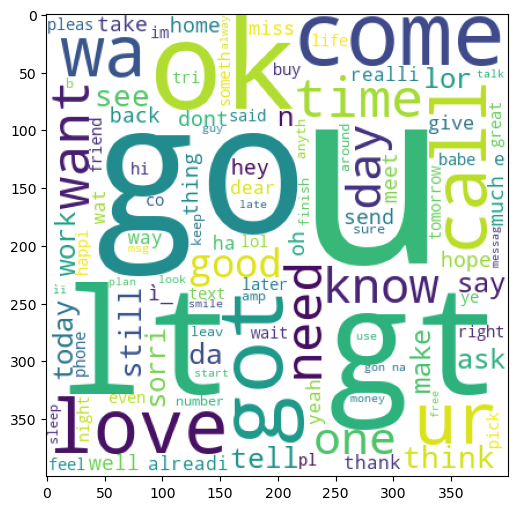

In [28]:
# HAM
ham_wc = wc.generate(spam_df[spam_df['target']==0]['trans_text'].str.cat(sep=" "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [29]:
# creating corpus
spam_corpus = []

for msg in spam_df[spam_df['target']==1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(len(spam_corpus))

12058


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


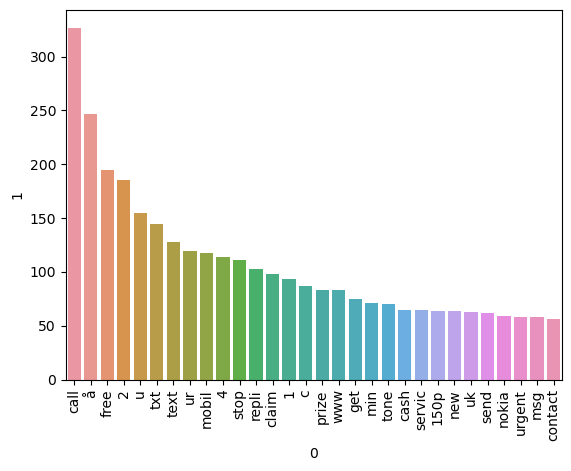

In [30]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
# creating corpus
ham_corpus = []
for msg in spam_df[spam_df['target']==0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print(len(ham_corpus))

37208


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


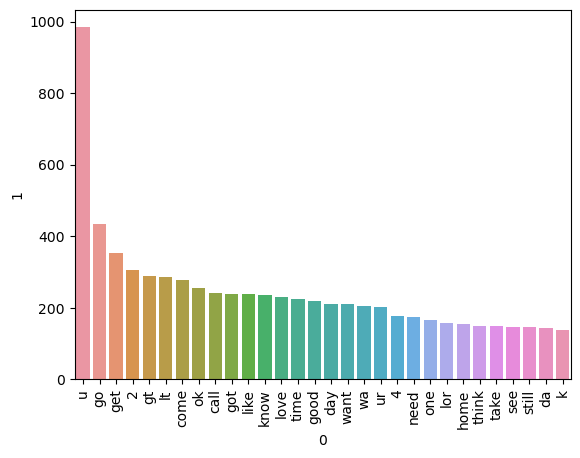

In [32]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [33]:
spam_df.head(5)

,target,text,no_chars,no_words,no_sentences,trans_text
0,0,Go until jurong point crazy Available only ...,117,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar Joking wif u oni,35,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,161,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor U c already then say...,55,13,1,u dun say earli hor u c alreadi say
4,0,Nah I don t think he goes to usf he lives aro...,67,15,1,nah think go usf life around though


In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [35]:
X = tfidf.fit_transform(spam_df['trans_text']).toarray()

In [36]:
X.shape

(5169, 3000)

In [37]:
Y = spam_df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [41]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [46]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1)) #low performance

0.8704061895551257
[[783 113]
 [ 21 117]]
0.508695652173913


In [47]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2)) #better

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [48]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3)) #better

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [54]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [55]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [56]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)        
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.975822,1.000000
5,RF,0.973888,0.982609
8,ETC,0.978723,0.975410
0,SVC,0.975822,0.966942
6,AdaBoost,0.971954,0.965812
4,LR,0.958414,0.961165
9,GBDT,0.947776,0.937500
10,xgb,0.969052,0.927419
7,BgC,0.958414,0.851852


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.975822
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.975822
5,AdaBoost,Accuracy,0.971954
6,LR,Accuracy,0.958414
7,GBDT,Accuracy,0.947776
8,xgb,Accuracy,0.969052
9,BgC,Accuracy,0.958414


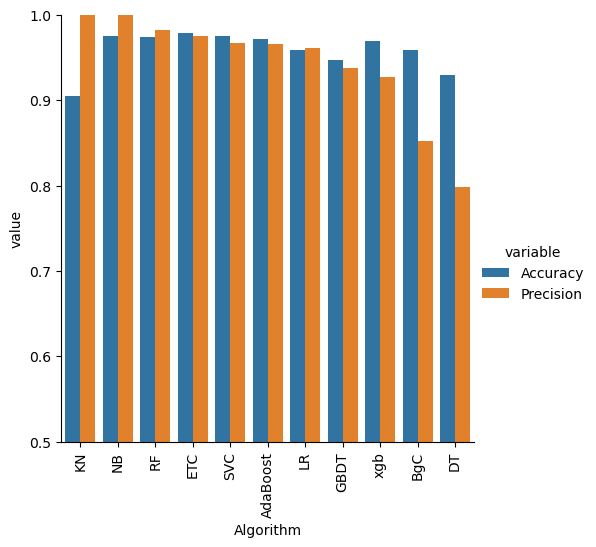

In [64]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()